1. PANDAS
---



In [2]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

In [7]:
file = pd.read_csv('chipotle.tsv', sep='\t')
file.tail(10)


,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


Количество строк 4622(от 0 до 4621)
Столбцы: order_id(id заказа), quantity(количество), item_name(название блюда), choice_description(состав блюда), item_price(цена)
Данные представляют собой описание блюда.


2. [0.25 баллов] Ответьте на вопросы:
Сколько заказов попало в выборку?
Сколько уникальных категорий товара было куплено? (item_name)

In [9]:
print(file['order_id'].nunique()) # кол-во заказов попало в выборку
print(file['item_name'].nunique()) # уникальных категорий

1834
50


3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках?

In [10]:
Nan_1 = (file['order_id'].isnull().any())
Nan_2 = (file['quantity'].isnull().any())
Nan_3 = (file['item_name'].isnull().any())
Nan_4 = (file['choice_description'].isnull().any())
Nan_5 = (file['item_price'].isnull().any())
print(Nan_1,Nan_2,Nan_3,Nan_4,Nan_5) # True - есть пропуски в колонке; False - нет пропусков в колонке

False False False True False


В колонке состав блюда есть пропуск

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [11]:
file = file.fillna('')
file

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.
Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [12]:
prices = file['item_price'].apply(lambda price: float(price[1:]))
prices.head()

,item_price
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98


тип данных float64

In [14]:
file['price'] = prices
file.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


Какая средняя/минимальная/максимальная цена у товара?

In [15]:
mean_price = prices.mean()
min_price = prices.min()
max_price = prices.max()

print(f"Средняя цена: {mean_price:.2f}")
print(f"Минимальная цена: {min_price:.2f}")
print(f"Максимальная цена: {max_price:.2f}")

Средняя цена: 7.46
Минимальная цена: 1.09
Максимальная цена: 44.25


Удалите старую колонку с ценой.

In [17]:
file.drop('item_price', axis=1, inplace=True) # axis=1 удаление столбца
file.head()

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)
Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [19]:
price = file.groupby('item_name')['price'].min()
price = price.sort_values(ascending=True)
price.head()

,price
item_name,
Bottled Water,1.09
Canned Soda,1.09
Canned Soft Drink,1.25
Side of Chips,1.69
Chips,1.99


In [20]:
price.tail()

,price
item_name,
Barbacoa Soft Tacos,8.99
Barbacoa Crispy Tacos,8.99
Carnitas Salad Bowl,9.39
Barbacoa Salad Bowl,9.39
Steak Salad Bowl,9.39


6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [21]:
ch = file[file['item_name'] == 'Chicken Bowl'].groupby('item_name')['quantity']
ch.value_counts()

item_name     quantity
Chicken Bowl  1           693
              2            31
              3             2
Name: count, dtype: int64

Получается, что 33 раза покупали больше 1 Chicken Bowl

7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?
Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [23]:
print(f"Средний чек: {file.groupby('order_id')['price'].sum().mean():.2f}")
print(f"Среднее количество товаров: {file.groupby('order_id')['quantity'].sum().mean():.1f}")

Средний чек: 18.81
Среднее количество товаров: 2.7


8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [31]:
single_item = (file.groupby('order_id')['quantity'].sum() == 1).sum()
print(f"Заказов с 1 товаром: {single_item}")

Заказов с 1 товаром: 56


9. [0.25 баллов] Какая самая популярная категория товара?

In [27]:
print(f"Самая популярная категория: {file['item_name'].value_counts().index[0]}")
print(f"Количество: {file.groupby('item_name')['quantity'].sum().max()}")

Самая популярная категория: Chicken Bowl
Количество: 761


10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [34]:
all_items = file['item_name'].unique()
c = 0
burritos = []
for item in all_items:
  if 'Burrito' in item:
    c += 1
    burritos.append(item)
c

6

Виды буррито:

In [35]:

burritos

['Steak Burrito',
 'Chicken Burrito',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Veggie Burrito',
 'Burrito']

In [37]:
df = file[file['item_name'].isin(burritos)]
t = df.groupby('item_name')['quantity'].sum()
t

,quantity
item_name,
Barbacoa Burrito,91
Burrito,6
Carnitas Burrito,60
Chicken Burrito,591
Steak Burrito,386
Veggie Burrito,97


Чаще всего покупают Chicken Burrito

In [40]:
p = file[file['item_name'].isin(burritos)].groupby('item_name')['price'].min()
p

,price
item_name,
Barbacoa Burrito,8.69
Burrito,7.40
Carnitas Burrito,8.69
Chicken Burrito,8.19
Steak Burrito,8.69
Veggie Burrito,8.49


Cамый дорогой Carnitas Burrito, Steak Burrito, Barbacoa Burrito - 8.69



11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?
Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно

In [41]:
# Добавляем сумму заказа к каждой строке
file['order_total'] = file.groupby('order_id')['price'].transform('sum')

# Находим товары, которые стоят более 40% от суммы своего заказа
expensive_items = file[file['price'] > 0.4 * file['order_total']]

# Считаем количество заказов с такими товарами
orders_with_expensive_items = expensive_items['order_id'].nunique()

print(f"Количество заказов с товаром дороже 40% от суммы чека: {orders_with_expensive_items}")

Количество заказов с товаром дороже 40% от суммы чека: 1624


12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [42]:
diet_coke_rows = file[file['choice_description'].str.contains('Diet Coke')]
total_extra = (1.35 - 1.25) * diet_coke_rows['quantity'].sum()
percent = (total_extra / (1.25 * diet_coke_rows['quantity'].sum())) * 100
print(f"на {percent:.1f}%")

на 8.0%


13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [43]:
matrix = [
    ['Убийственный класс', '(комедия/боевик)'],
    ['Стальной Алхимик: Братство', '(боевик)'],
    ['Саики Кусуо', '(комедия)'],
    ['Твоя апрельская ложь', '(романтика/драма)'],
    ['Нитидзё', '(комедия)'],
    ['Steins;Gate', '(фантастика/триллер)'],
    ['Хоримия', '(романтика)'],
    ['Моя геройская академия', '(комедия/боевик)'],
    ['Fate/Zero', '(триллер/боевик)'],
    ['Корзинка фруктов', '(романтика)'],
    ['Плутон', '(триллер/боевик)'],
    ['Галактика Татами', '(комедия/фантастика)'],
    ['Атака титанов', '(боевик/триллер)'],
    ['Ковбой Бибоп', '(фантастика/боевик)'],
    ['Шова Генроку Ракуго Синдзю', '(драма)']
]

In [45]:
# Создаем DataFrame с колонками index, column1, column2
df_anime = pd.DataFrame(matrix, columns=['column1', 'column2'])
df_anime.insert(0, 'index', range(len(matrix)))

# Делаем колонку 'index' индексом
df_anime.set_index('index', inplace=True)

df_anime

,column1,column2
index,,
0,Убийственный класс,(комедия/боевик)
1,Стальной Алхимик: Братство,(боевик)
2,Саики Кусуо,(комедия)
3,Твоя апрельская ложь,(романтика/драма)
4,Нитидзё,(комедия)
5,Steins;Gate,(фантастика/триллер)
6,Хоримия,(романтика)
7,Моя геройская академия,(комедия/боевик)
8,Fate/Zero,(триллер/боевик)


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [46]:
df_anime.to_csv('anime.csv', index=False, header=False)


2. Визуализации и matplotlib

---



In [47]:
%matplotlib inline
#нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

In [55]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=file.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(file.order_id.nunique())]


file['date'] = file.order_id.map(dates['date'])

In [56]:

file.head(15)

,order_id,quantity,item_name,choice_description,price,order_total,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,11.56,2018-01-10
1,1,1,Izze,[Clementine],3.39,11.56,2018-01-10
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,2018-01-10
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,11.56,2018-01-10
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,2018-01-11
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67,2018-01-05
6,3,1,Side of Chips,,1.69,12.67,2018-01-05
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00,2018-01-27
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00,2018-01-27
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70,2018-01-27


1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.
Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

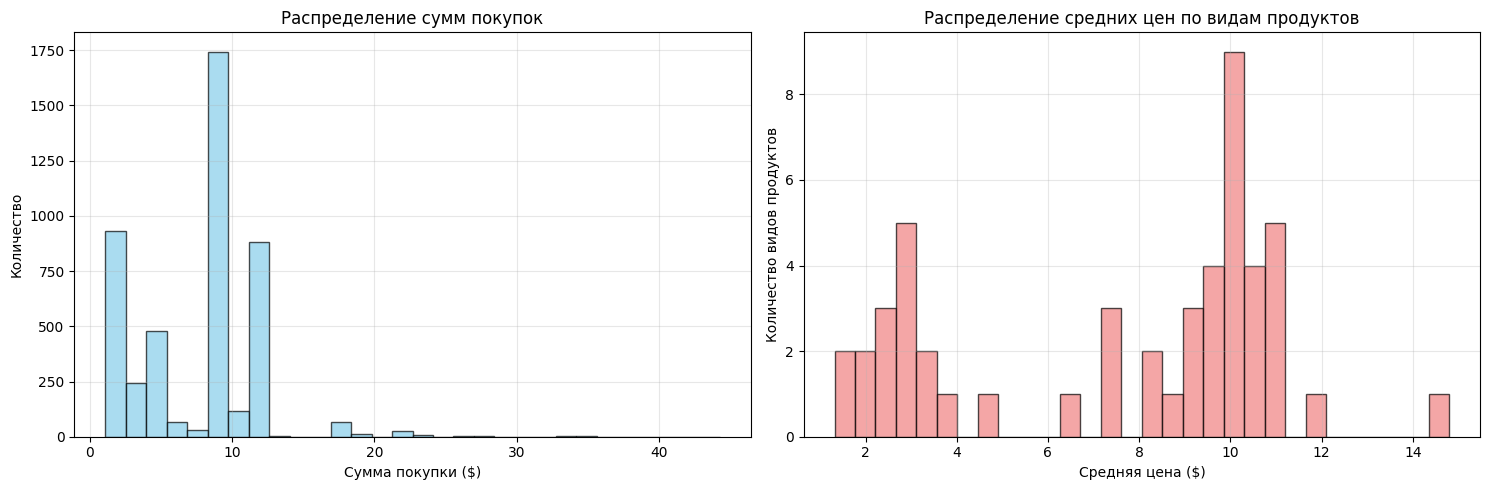

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. Гистограмма распределения сумм покупок
ax1.hist(file['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Сумма покупки ($)')
ax1.set_ylabel('Количество')
ax1.set_title('Распределение сумм покупок')
ax1.grid(True, alpha=0.3)

# 2. Гистограмма средних цен
avg_prices = file.groupby('item_name')['price'].mean()
ax2.hist(avg_prices, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Средняя цена ($)')
ax2.set_ylabel('Количество видов продуктов')
ax2.set_title('Распределение средних цен по видам продуктов')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

2. [1 балл] Постройте график зависимости суммы покупок от дней.

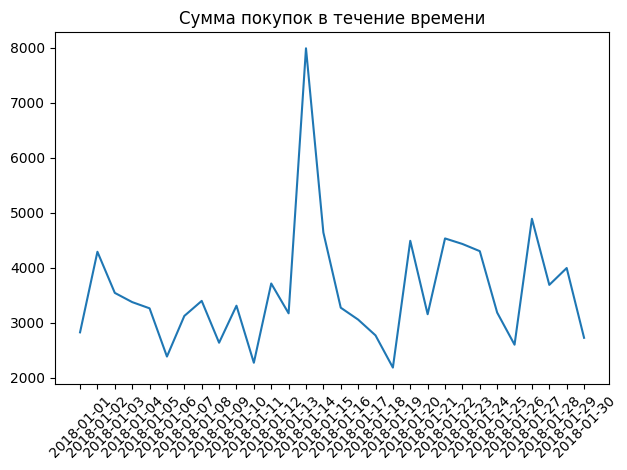

In [64]:

dr = file.groupby(file['date'])['order_total'].sum()
plt.plot(dr)
plt.title("Сумма покупок в течение времени")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

In [65]:
import datetime as dt
dr = file.groupby(pd.to_datetime(file['date']).dt.dayofweek)['order_total'].mean()
dr = dr.reset_index()
dr

,date,order_total
0,0,22.822921
1,1,22.972623
2,2,22.117741
3,3,20.847410
4,4,20.906993
5,5,24.916528
6,6,27.230516


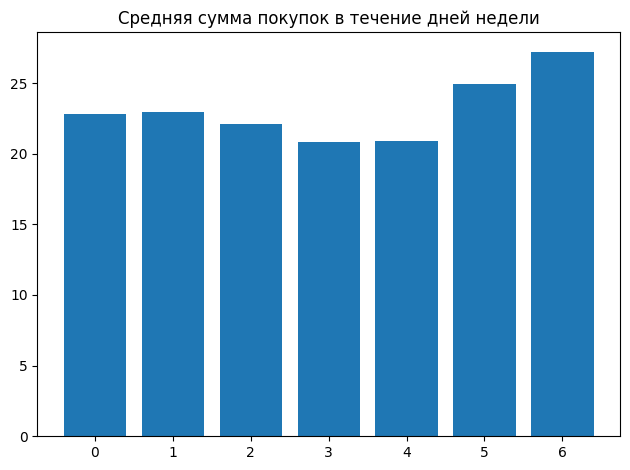

In [66]:
plt.bar(dr['date'], dr['order_total'])
plt.title("Средняя сумма покупок в течение дней недели")
plt.tight_layout()
plt.show()

4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

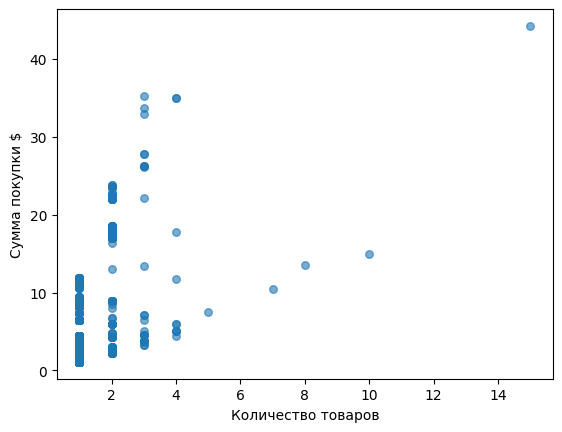

In [68]:
plt.scatter(file['quantity'], file['price'], alpha=0.6, s=30)
plt.xlabel('Количество товаров')
plt.ylabel('Сумма покупки $')
plt.savefig('scatter_plot.pdf')
plt.show()

In [69]:
from google.colab import files
files.download('scatter_plot.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>